Feature names (vocabulary):
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Term Frequency Matrix:
   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         1      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1


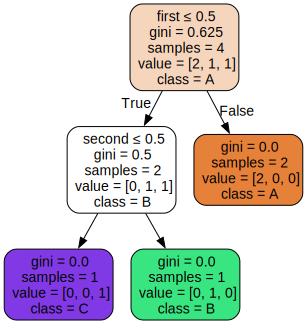

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import ExtraTreesClassifier
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer
# 定义一些示例文本数据
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]
labels = ["A","B","C","A"]
# 创建 CountVectorizer 实例，默认参数
vectorizer = CountVectorizer(binary=True)

# 拟合并转换文本数据，得到词频矩阵
X = vectorizer.fit_transform(texts)
# 创建决策树分类器实例并拟合数据
clf = DecisionTreeClassifier(random_state=1234,max_depth=5)
model = clf.fit(X, labels)
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=vectorizer.get_feature_names_out(),  
                           class_names=labels,  
                           filled=True, rounded=True,  
                           special_characters=True)  
# 将结果转换为 DataFrame 以便于阅读
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Feature names (vocabulary):")
print(vectorizer.get_feature_names_out())
print("\nTerm Frequency Matrix:")
print(df)

graphviz.Source(dot_data)


In [32]:
import numpy as np

def calculate_idf(documents):
    # 创建词汇表
    vocab = set(word for doc in documents for word in doc.split())
    print(vocab)
    # 计算每个词的文档频率 (df)
    df = {word: sum(word in doc.split() for doc in documents) for word in vocab}
    print(df)
    # 文档总数
    N = len(documents)
    
    # 确保没有除以零的情况，并计算 IDF
    idf = {word: np.log(N / float(df[word])) + 1 if df[word] > 0 else 0 for word in df}
    
    return idf

# 示例文档
documents = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document"
]

# 获取 IDF 值
idf_values = calculate_idf(documents)
print("Manually calculated IDF values:", idf_values)

{'the', 'is', 'document', 'and', 'first', 'one', 'third', 'second', 'this'}
{'the': 4, 'is': 4, 'document': 3, 'and': 1, 'first': 2, 'one': 1, 'third': 1, 'second': 1, 'this': 4}
Manually calculated IDF values: {'the': 1.0, 'is': 1.0, 'document': 1.2876820724517808, 'and': 2.386294361119891, 'first': 1.6931471805599454, 'one': 2.386294361119891, 'third': 2.386294361119891, 'second': 2.386294361119891, 'this': 1.0}


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 示例文档
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document? all right"
]

# 创建 TfidfVectorizer 实例
vectorizer = TfidfVectorizer()

# 拟合文档并转换为 TF-IDF 矩阵
X_tfidf = vectorizer.fit_transform(documents)

# 获取词汇表和对应的 IDF 值
idf = vectorizer.idf_
print("Vocabulary:", dict(zip(vectorizer.get_feature_names_out(), idf)))

# 查看每个文档的 TF-IDF 分数
feature_names = vectorizer.get_feature_names_out()
for i, doc in enumerate(documents):
    print(f"\nDocument {i+1}: '{doc}'")
    tfidf_scores = zip(feature_names, X_tfidf[i].toarray()[0])
    for word, score in tfidf_scores:
        if word == 'this':
            print(f"Word: {word}, TF-IDF Score: {score}")

Vocabulary: {'all': 1.916290731874155, 'and': 1.916290731874155, 'document': 1.2231435513142097, 'first': 1.5108256237659907, 'is': 1.0, 'one': 1.916290731874155, 'right': 1.916290731874155, 'second': 1.916290731874155, 'the': 1.0, 'third': 1.916290731874155, 'this': 1.0}

Document 1: 'This is the first document.'
Word: this, TF-IDF Score: 0.38408524091481483

Document 2: 'This document is the second document.'
Word: this, TF-IDF Score: 0.281088674033753

Document 3: 'And this is the third one.'
Word: this, TF-IDF Score: 0.267103787642168

Document 4: 'Is this the first document? all right'
Word: this, TF-IDF Score: 0.26609474426129054
